# 4장 인공지능 개론

* "부록3 매트플롯립 입문"에서 한글 폰트를 올바르게 출력하기 위한 설치 방법을 설명했다. 설치 방법은 다음과 같다.

In [1]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no suc

In [2]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1

* 모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임]** -> **[런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.

In [1]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# Colab, Linux
# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

# Window
# font_name = "NanumBarunGothic"

# Mac
# font_name = "AppleGothic"

In [2]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = ":"

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

## 퍼셉트론 (Perceptron)

In [ ]:
import torch
from torch import nn #신경망 구성요소를 모아둔 라이브러리 
import torch.nn.functional as F

### 선형 퍼셉트론 구현

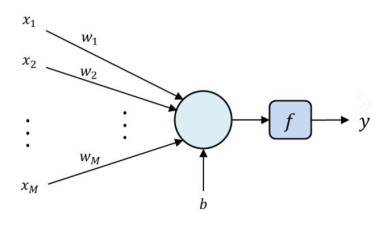

In [4]:
## 선형 퍼셉트론 구현

def perceptron(x, w, b = 0):
    if not isinstance(x, np.ndarray) or not isinstance(w, np.ndarray):
        x = np.array(x)
        w = np.array(w)
    prod = x*w #wi*xi
    y = np.sum(prod) + b
    return y

x = [1, 2, 3]
w = [1, 2, 3]
# x = np.array([1, 2, 3])
# w = np.array([1, 2, 3])

y = perceptron(x, w)
print("result =", y)

result = 14


In [ ]:
## 선형 퍼셉트론 구현: 랜텀 initial weights

def perceptron(x):
    if not isinstance(x, np.ndarray):
        x=np.array(x)

    w = np.random.rand(len(x)) #w값은 랜덤으로 지정 #초기화 
    b = np.random.rand()

    y = np.sum(x*w) + b
    
    return y, w, b

x = np.array([1, 2, 3])

y, w, b = perceptron(x)

print("y =", y.round(3))
print("weight = ", w)
print("b = ", round(b, 3))


y = 3.559
weight =  [0.5514 0.8556 0.2868]
b =  0.436


### Pytorch 를 이용한 perceptron

💡 비유로 정리하면:

요소	역할	비유
y.weight	모델의 가중치 (학습 대상)	선생님이 들고 있는 답안지

y.bias	모델의 편향 (학습 대상)	봐주는 점수

x	입력 데이터 (학습 대상 아님)	학생이 푼 문제지

y(x)	결과 출력 (계산된 점수)	학생의 최종 점수

🤔 그래서 왜 둘 다 "랜덤"이냐?
지금은 학습 전에 단순 테스트용으로 코드 돌리는 상황이기 때문에,

weight, bias, x 모두 랜덤 초기화로 실험하는 것뿐이야.

실제로 학습을 시작하면:

x: 실제 데이터를 넣고

weight와 bias: 점점 학습되어 변경돼

In [ ]:
## Pytorch 를 이용한 perceptron
# torch.manual_seed(0)
#Pytorch model class 

#10개의 입력을 받아 1개의 출력으로 변환하는 퍼셉트론 
input_size = 10
output_size = 1
y = nn.Linear(input_size, output_size) #class instance 

print("weights = \n", y.weight) #모델의 가중치(학습대상) 
print("bias = \n", y.bias) #모델의 편향(학습대상)
print("="*50)

# 난수 생성
x = torch.rand(input_size)
print("x input = \n", x) #입력데이터(학습대상아님)

print("output = ", y(x)) #결과 출력 

weights = 
 Parameter containing:
tensor([[-0.0548,  0.3072, -0.0819,  0.1861, -0.1599,  0.2841, -0.0619, -0.0911,
          0.0939, -0.1001]], requires_grad=True)
bias = 
 Parameter containing:
tensor([0.1863], requires_grad=True)
x input = 
 tensor([0.4136, 0.8328, 0.9997, 0.6816, 0.3067, 0.1718, 0.0787, 0.5158, 0.2942,
        0.7688])
output =  tensor([0.3630], grad_fn=<ViewBackward0>)


In [ ]:
#시그모이드 고려
def perceptron(x):
    if not isinstance(x, np.ndarray):
        x=np.array(x)

    w = np.random.randn(len(x)) #w값은 랜덤으로 지정 #초기화 
    b = np.random.rand()

    z = np.sum(x*w) + b

    return z, w, b
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([1, 2, 3]) #inputs
z, w, b = perceptron(x) 

y= sigmoid(z) #0~1

print("z =", z.round(3))
print("weight = ", w)
print("b = ", round(b, 3))

print("y=",y)

z = 1.613
weight =  [0.417  0.3141 0.1642]
b =  0.075
y= 0.8337707660873263


## 오류 순전파 (Forward propagation)

In [29]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sse(y, x):
    return (y-x)**2

def perceptron(x, w, b = 0):
    if not isinstance(x, np.ndarray) or not isinstance(x, np.ndarray):
        x = np.array(x)
        w = np.array(w)
    y = np.sum(x*w) + b
    return y

## 활성화 함수 (Activation function)

In [30]:
## 시그모이드 (sigmoid)
def activation_plot(x, y, title:str):
    plt.plot(x, y)
    plt.title(title)
    # plt.grid(linestyle = ":")
    plt.show()

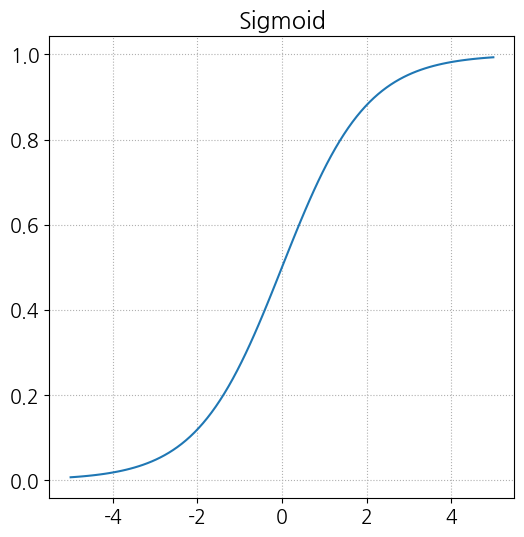

In [35]:
# numpy
x = np.linspace(-5, 5, 100)
def sigmoid(x):
    y = 1/(1 + np.exp(-x))
    return y
y = sigmoid(x)

# torch class
# torch_simoid = nn.Sigmoid()
# y = torch_simoid(torch.tensor(x))
# y = F.sigmoid(torch.tensor(x))

activation_plot(x, y, "Sigmoid")

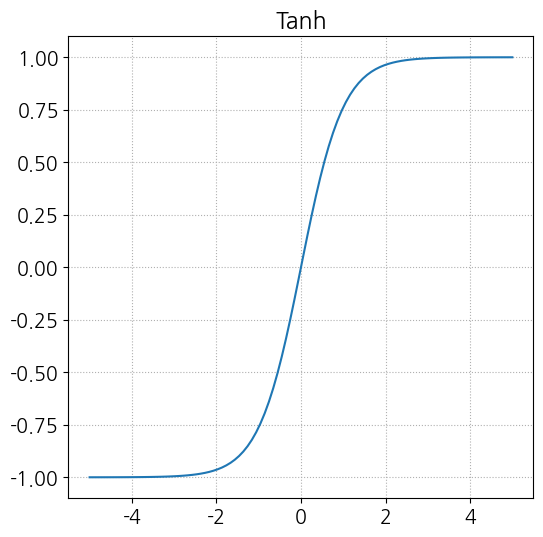

In [ ]:
## Tanh (Hyperbolic Tangent)
def tanh(x):
    y = np.tanh(x)
        # y = (np.exp(x) - np.exp(-x))/ (np.exp(x) + np.exp(-x))
    return y
y = tanh(x)

# nn class
torch_tanh = nn.Tanh() #클래스 생성 
y = torch_tanh(torch.tensor(x)) 
y = F.tanh(torch.tensor(x))

activation_plot(x, y, "Tanh")

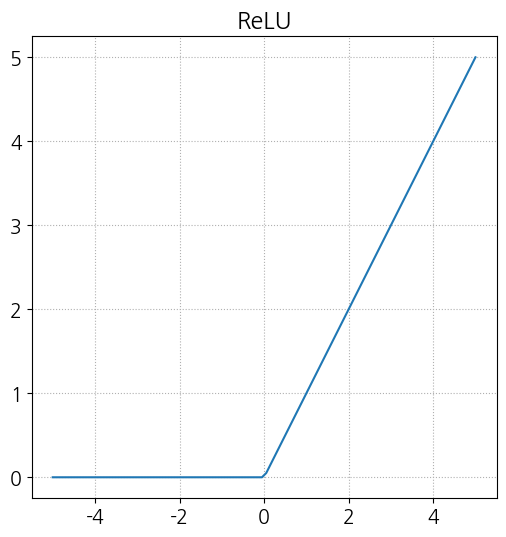

In [ ]:
## ReLU (Rectified Linear Unit)
def relu(x):
    y = np.maximum(0, x)
    return y
y=relu(x)

# nn class 
torch_relu = nn.ReLU()
y = torch_relu(torch.tensor(x))
y = F.relu(torch.tensor(x))

# y = relu(x)
activation_plot(x, y, "ReLU")

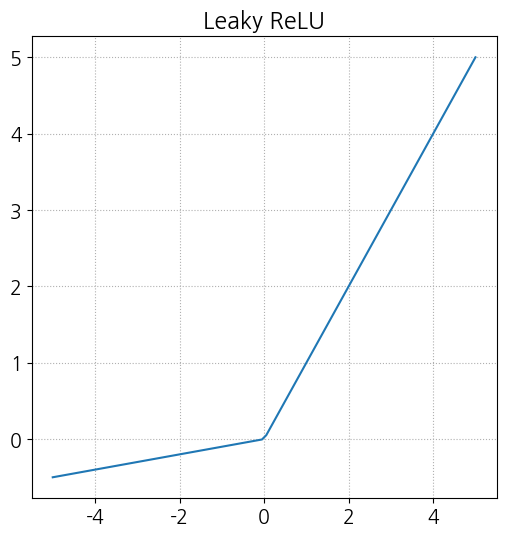

In [ ]:
## Leaky ReLU
def leakyRelu(x, alpha:float):
    y = np.maximum(alpha*x, x)
    return y
y = leakyRelu(x, 0.1)

# nn class 
torch_lrelu = nn.LeakyReLU(0.1)
y = torch_lrelu(torch.tensor(x))

y = F.leaky_relu(torch.tensor(x), 0.1)


activation_plot(x, y, "Leaky ReLU")

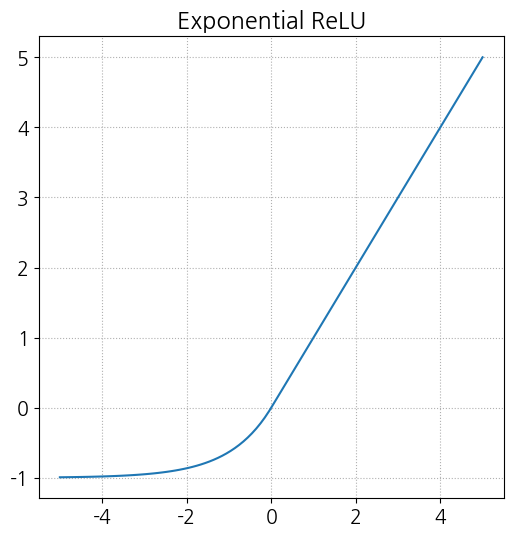

In [40]:
## Exponential ReLU
def eRelu(x, alpha):
    y = (x>0)*x + (x <= 0)*(alpha*(np.exp(x) - 1))
    return y

y = eRelu(x, 1.)

# torch
# torch_lrelu = nn.GELU(0.1)
# y = torch_lrelu(torch.tensor(x))
# y = F.leaky_relu(torch.tensor(x), 0.1)

activation_plot(x, y, "Exponential ReLU")